# Spam Comments Detection with Machine Learning

Spam comments detection means classifying comments as spam or not spam. YouTube is one of the platforms that uses Machine Learning to filter spam comments automatically to save its creators from spam comments. If you want to learn how to detect spam comments with Machine Learning, this article is for you. In this article, I will take you through the task of Spam comments detection with Machine Learning using Python.

In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv("Youtube01-Psy.csv")

In [22]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


Bir NLP projesine başlarken dikkat etmek gerekenler

1-herşeyi küçük harfe çevir

2-noktalama işaretlerini kaldır

3-reklamları kaldır

4-satır sonlarını kaldır

5stopwords gereksiz kelimeleri çıkar

6 tokenize et

7 lemma ve stema ile ekleri kaldır ve kökleri bul

8-vektorize et



In [23]:
df=df[["CONTENT", "CLASS"]]

In [24]:
df.isnull().sum()

,0
CONTENT,0
CLASS,0


In [25]:
df['CONTENT'] = df['CONTENT'].str.lower()
df['CONTENT'] = df['CONTENT'].str.replace('[^\w\s]','')
df['CONTENT'] = df['CONTENT'].str.replace('\n','')
df['CONTENT'] = df['CONTENT'].str.replace('\d+','',regex=True)
df['CONTENT'] = df['CONTENT'].str.replace('\'','')
df['CONTENT'] = df['CONTENT'].str.replace('\r','')

<ipython-input-25-6839f7bbc4be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CONTENT'] = df['CONTENT'].str.lower()
<ipython-input-25-6839f7bbc4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CONTENT'] = df['CONTENT'].str.replace('[^\w\s]','')
<ipython-input-25-6839f7bbc4be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [26]:
pip install wordcloud matplotlib

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [36]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

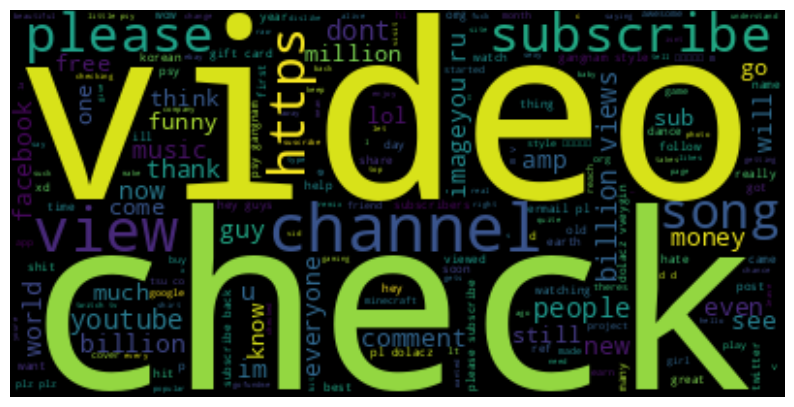

In [37]:
wc(df['CONTENT'],'black')

In [39]:
notspam=df[df['CLASS']==0]['CONTENT']
spam=df[df['CLASS']==1]['CONTENT']

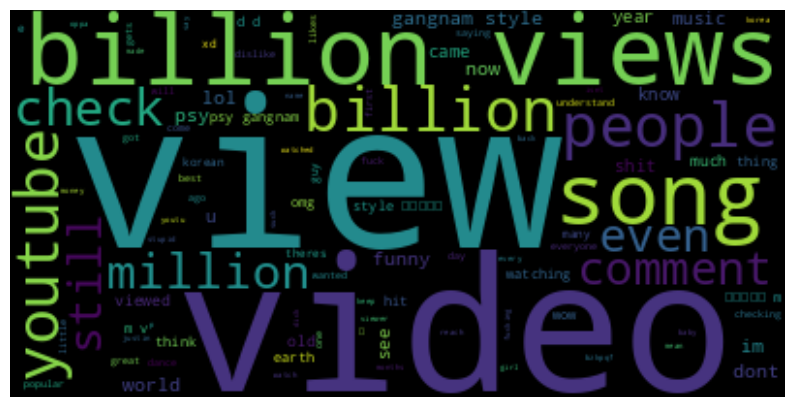

In [40]:
wc(notspam,'black')

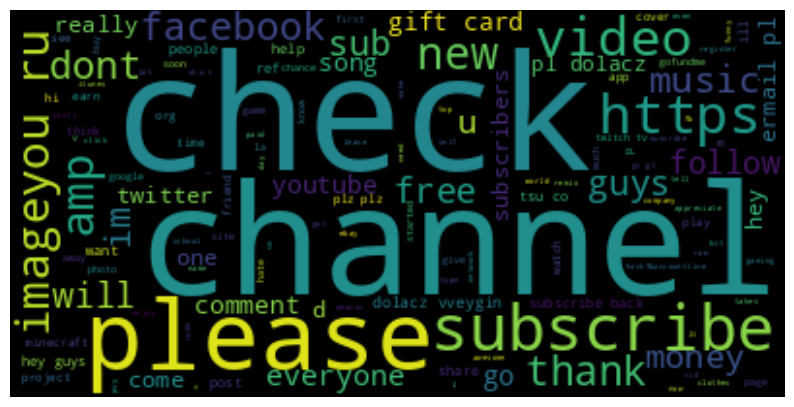

In [41]:
wc(spam,'black')

In [52]:
x=df['CONTENT']
y=df['CLASS']

In [53]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [59]:
vect = CountVectorizer(ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [62]:
x=vect.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [61]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [63]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [64]:
nb=MultinomialNB()

In [65]:
model=nb.fit(x_train,y_train)

In [66]:
tahmin=model.predict(x_test)

In [67]:
accuracy_score(tahmin,y_test)

0.9428571428571428

In [70]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

0.9571428571428572


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [74]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[48  0]
 [ 4 53]]
LogisticRegression()  modeli eğitiliyor!..
[[47  1]
 [ 4 53]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[43  5]
 [ 4 53]]
RandomForestClassifier()  modeli eğitiliyor!..
[[45  3]
 [ 4 53]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[45  3]
 [ 3 54]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[45  3]
 [ 7 50]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[45  3]
 [ 3 54]]
MultinomialNB()  modeli eğitiliyor!..
[[47  1]
 [ 2 55]]
Eğitim tamamlandı.
En başarılı model:  MultinomialNB
Confusion Matrix:
[[47  1]
 [ 2 55]]
classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.98      0.96      0.97        57

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Diğer Modeller:


,Accuracy,Precision,Recall,F1
MultinomialNB,0.971429,0.971429,0.971429,0.971429
BernoulliNB,0.961905,0.961905,0.961905,0.961905
LogisticRegression,0.952381,0.952381,0.952381,0.952381
GradientBoostingClassifier,0.942857,0.942857,0.942857,0.942857
AdaBoostClassifier,0.942857,0.942857,0.942857,0.942857
RandomForestClassifier,0.933333,0.933333,0.933333,0.933333
DecisionTreeClassifier,0.914286,0.914286,0.914286,0.914286
KNeighborsClassifier,0.904762,0.904762,0.904762,0.904762
